# **Clustering Customer Segmentation for Kalbe Nutritional Products**

by Riskiyatul Hasanah

## **Table of Content**
- Business Understanding
    - Problem Statement
    - Goals
    - Objectives
- Data Preparation
    - Data Description
    - Libraries & Dataset
- Data Understanding
    - Exploring Dataset
        - Basic Dataset Information
        - Checking Duplicate Rows
        - Checking Missing Values
        - Division by Type of Data
    - Data Types Information
- Data Cleansing/Preprocessing
    - Handling Missing Values
    - Handling Duplicated Rows
- Modelling & Evaluation
- Busineess Recomendation

## **Business Understanding**

### **Problem Statement**

Marketing team need to create a customer cluster or segmentation customer based on specific criteria. The primary objective of this project is to develop customer segmentation to serve the foundation for marketing team to deliver personalized promotion and sales treatment to enhance customer engagement and satisfaction. It's hoped that customer segmentation will be able to increase sales retention

### **Goals**

The company want to create customer segmentation to provide personalized promotion and sales treatment

### **Objectives**

Create K-Means clustering model to divide some of customers into certain clusters

# **Data Preparation**

## **Data Description**

```
This project is from Project Based Internship program by Rakamin Academy x Kalbe Nutritionals

```

**Dataset Description:**

The training dataset contains `5020 samples`. Contains `18 features` :

**1. Customer**:
- `CustomerID`: Unique Customer ID
- `Age`: Customer's Age
- `Gender`: Gender of customer
- `Marital Status`: Marital status of customer
- `Income`: Monthly Income of customer in millions of IDR

**2. Store**:
- `StoreID`: Unique Store Code
- `StoreName`: Store Name
- `GroupStore`: Group Name
- `Type`: The type of store : Modern Trade, General Trade
- `Latitude`: Latitude Code
- `Longitude`: Longitude Code

**3. Product**:
- `ProductID`: Unique Product Code
- `Product Name`: Product Name
- `Price`: Price of product in IDR

**4. Transaction**:
- `TransactionID`: Unique Transaction Code
- `Date`: Transaction Date
- `Qty`: Quantity of items purchased

## **Libraries and Dataset**

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings 
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### **Import Dataset**

In [2]:
# read all dataset
df_customer = pd.read_csv('Case Study - Customer.csv', sep=";")
df_product = pd.read_csv('Case Study - Product.csv', sep=";")
df_transaction = pd.read_csv('Case Study - Transaction.csv', sep=";")
df_store = pd.read_csv('Case Study - Store.csv', sep=";")

In [3]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [5]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [6]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [7]:
# menggabungkan seluruh dataset
df_merge = pd.merge(df_customer, df_transaction, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product.drop(columns=['Price']), on=['ProductID'])
df_merge = pd.merge(df_merge, df_store, on=['StoreID'])
df_merge.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,"5,12",TR54475,23/02/2022,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
1,5,58,1,Married,"3,57",TR53643,22/05/2022,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
2,7,31,0,Married,"4,57",TR5151,10/03/2022,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
3,19,24,1,Single,"4,14",TR98635,18/06/2022,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
4,28,55,0,Married,"6,08",TR9420,12/01/2022,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"


In [8]:
df = df_merge.copy()
df.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,"5,12",TR54475,23/02/2022,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
1,5,58,1,Married,"3,57",TR53643,22/05/2022,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
2,7,31,0,Married,"4,57",TR5151,10/03/2022,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
3,19,24,1,Single,"4,14",TR98635,18/06/2022,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
4,28,55,0,Married,"6,08",TR9420,12/01/2022,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"


# **Data Understanding**

## **Exploring Dataset**

### **Basic Datasets Information**

In [9]:
print("Shape of data :", df.shape)
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Shape of data : (5020, 18)
Number of rows : 5020
Number of columns : 18


In [10]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Marital Status', 'Income',
       'TransactionID', 'Date', 'ProductID', 'Price', 'Qty', 'TotalAmount',
       'StoreID', 'Product Name', 'StoreName', 'GroupStore', 'Type',
       'Latitude', 'Longitude'],
      dtype='object')

In [11]:
# get the info of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      5020 non-null   int64 
 1   Age             5020 non-null   int64 
 2   Gender          5020 non-null   int64 
 3   Marital Status  4976 non-null   object
 4   Income          5020 non-null   object
 5   TransactionID   5020 non-null   object
 6   Date            5020 non-null   object
 7   ProductID       5020 non-null   object
 8   Price           5020 non-null   int64 
 9   Qty             5020 non-null   int64 
 10  TotalAmount     5020 non-null   int64 
 11  StoreID         5020 non-null   int64 
 12  Product Name    5020 non-null   object
 13  StoreName       5020 non-null   object
 14  GroupStore      5020 non-null   object
 15  Type            5020 non-null   object
 16  Latitude        5020 non-null   object
 17  Longitude       5020 non-null   object
dtypes: int64

**Observations:**

- Dataset contain `18 columns` and `5020 rows` of data
- There are 2 types of data : `int64, object`
- Column `Marital Status` contain 4976 nilai non-null, and `44 nilai null / missing values`

### **Checking Duplicate Rows**

In [12]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude


In [13]:
df.duplicated().sum()

0

**Observations:** 

Dataset has no duplicates value

### **Checking Missing Values**

In [14]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Marital Status    44
Income             0
TransactionID      0
Date               0
ProductID          0
Price              0
Qty                0
TotalAmount        0
StoreID            0
Product Name       0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
dtype: int64

In [15]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
print(nvc)

Missing values status: True
                Total Null Values  Percentage Data Type
Marital Status                 44       0.876    object
CustomerID                      0           0     int64
Type                            0           0     int64
GroupStore                      0           0     int64
StoreName                       0           0    object
Product Name                    0           0    object
StoreID                         0           0    object
TotalAmount                     0           0    object
Qty                             0           0    object
Price                           0           0     int64
ProductID                       0           0     int64
Date                            0           0     int64
TransactionID                   0           0     int64
Income                          0           0    object
Gender                          0           0    object
Age                             0           0    object
Latitude            

In [16]:
missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', '', ' ', '-1', -1]
for i in df.columns:
    dmmy_col = df[i].apply(lambda x : str(x).strip())
    isnan = dmmy_col.isin(missing_values).any()
    miss = np.unique(dmmy_col[dmmy_col.isin(missing_values)].values)
    if isnan :
        print("{} = {} - {}".format(i, isnan, miss))

Marital Status = True - ['nan']


<Figure size 1000x600 with 0 Axes>

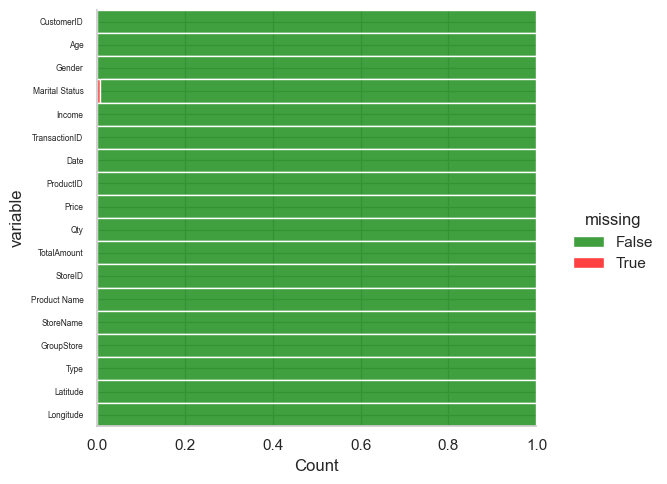

In [17]:
plt.figure(figsize=(10,6))

dms = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    palette = ["green","red"]
)

dms.set_yticklabels(size = 6)

**Observations:**

- Column `Marital Status` contain 4976 nilai non-null, and `44 nilai null / missing values`

**Things that must be done during Data Preprocessing:**

- Because there is not too much of data, for `Missing Values` in column `Marital Status` will be carried out `Imputation` at the Data Preprocessing stage. Imputation using Mode because Marital Status column is Categorical

### **Division by Type of Data**

In [18]:
df.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,"5,12",TR54475,23/02/2022,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
1,5,58,1,Married,"3,57",TR53643,22/05/2022,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
2,7,31,0,Married,"4,57",TR5151,10/03/2022,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
3,19,24,1,Single,"4,14",TR98635,18/06/2022,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
4,28,55,0,Married,"6,08",TR9420,12/01/2022,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"


In [19]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Marital Status', 'Income',
       'TransactionID', 'Date', 'ProductID', 'Price', 'Qty', 'TotalAmount',
       'StoreID', 'Product Name', 'StoreName', 'GroupStore', 'Type',
       'Latitude', 'Longitude'],
      dtype='object')

In [20]:
cat_id_cols = ['CustomerID', 'TransactionID', 'ProductID', 'StoreID']
cat_cols = ['Gender', 'MaritalStatus', 'ProductName', 'StoreName', 'GroupStore', 'Type']
            
num_cols = ['Age', 'Income', 'Price', 'Qty', 'TotalAmount', 'Latitude', 'Longitude']

timestamp = ['Date']

## **Data Types Information**

In [21]:
print('Data type before correction:\n')
df.info()

Data type before correction:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      5020 non-null   int64 
 1   Age             5020 non-null   int64 
 2   Gender          5020 non-null   int64 
 3   Marital Status  4976 non-null   object
 4   Income          5020 non-null   object
 5   TransactionID   5020 non-null   object
 6   Date            5020 non-null   object
 7   ProductID       5020 non-null   object
 8   Price           5020 non-null   int64 
 9   Qty             5020 non-null   int64 
 10  TotalAmount     5020 non-null   int64 
 11  StoreID         5020 non-null   int64 
 12  Product Name    5020 non-null   object
 13  StoreName       5020 non-null   object
 14  GroupStore      5020 non-null   object
 15  Type            5020 non-null   object
 16  Latitude        5020 non-null   object
 17  Longitude       5020 n

**Change the Some column data type**

change of  some columns data type like Income, Latitude and Longitude from `object` to `float64`

In [22]:
df['Income'] = df['Income'].replace('[,]','.', regex=True).astype('float')
df['Latitude'] = df['Latitude'].replace('[,]','.', regex=True).astype('float')
df['Longitude'] = df['Longitude'].replace('[,]','.', regex=True).astype('float')

To make the date and part of extraction process easier, the Date `object` column has been changed to `datetime64`

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
print('Data type after correction:\n')
df.info()

Data type after correction:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      5020 non-null   int64         
 1   Age             5020 non-null   int64         
 2   Gender          5020 non-null   int64         
 3   Marital Status  4976 non-null   object        
 4   Income          5020 non-null   float64       
 5   TransactionID   5020 non-null   object        
 6   Date            5020 non-null   datetime64[ns]
 7   ProductID       5020 non-null   object        
 8   Price           5020 non-null   int64         
 9   Qty             5020 non-null   int64         
 10  TotalAmount     5020 non-null   int64         
 11  StoreID         5020 non-null   int64         
 12  Product Name    5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-nu

# **Data Cleansing/Preprocessing**

## **Handling Missing Value**

Check the number of Missing Values and their Percentage

In [25]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc.style.background_gradient(cmap='GnBu')

Missing values status: True


,Total Null Values,Percentage,Data Type
Marital Status,44,0.876494,object
CustomerID,0,0.000000,int64
Age,0,0.000000,int64
Gender,0,0.000000,int64
Income,0,0.000000,float64
TransactionID,0,0.000000,object
Date,0,0.000000,datetime64[ns]
ProductID,0,0.000000,object
Price,0,0.000000,int64
Qty,0,0.000000,int64


### **Imputation**

Imputation (Mode), because the `Marital Status` column is Categorical

In [26]:
# Imputation using fillna
mode = df['Marital Status'].mode()[0]
df['Marital Status'].fillna(mode, inplace=True)
df['Marital Status'].isna().sum()

0

## **Handling Duplicate Rows**

In [27]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude


In [28]:
df.duplicated().sum()

0

# **Modelling and Evaluation**

## **Clustering Model**

### **New DataFrame for K-Means Modeling** ###

In [29]:
df.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,5.120,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.655,128.191
1,5,58,1,Married,3.570,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.655,128.191
2,7,31,0,Married,4.570,TR5151,2022-10-03,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,-3.655,128.191
3,19,24,1,Single,4.140,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.655,128.191
4,28,55,0,Married,6.080,TR9420,2022-12-01,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.655,128.191


In [30]:
df_clustering = df.groupby('CustomerID').agg({'TransactionID' : 'count',
                                          'Qty' : 'sum',
                                          'TotalAmount' : 'sum'}).reset_index()
df_clustering.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [31]:
print("Shape of data :", df_clustering.shape)
print("Number of rows :", df_clustering.shape[0])
print("Number of columns :", df_clustering.shape[1])

Shape of data : (447, 4)
Number of rows : 447
Number of columns : 4


### **Standardization Data**

In [32]:
clust_df = df_clustering.drop(columns=['CustomerID'])
clust_df.head()

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [33]:
# Standardize the Data
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data in cluster_df
df_clustering_std = scaler.fit_transform(clust_df.values)

# Convert the standardized data back to a DataFrame
df_clustering_std = pd.DataFrame(df_clustering_std, columns=clust_df.columns)

# check the cluster_df_std data
df_clustering_std.head()

,TransactionID,Qty,TotalAmount
0,1.780,1.497,2.095
1,0.546,1.261,0.239
2,1.163,1.183,0.672
3,-0.380,0.398,-0.482
4,-1.305,-1.093,-0.754


### **Identifying the Number of Clusters**

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. <br>
Distortion is calculated as the average of the squared distances (let’s say Euclidean distance) from the cluster centers of the respective clusters. Inertia represents the sum of squared distances of samples to their closest cluster center.

### **Elbow Method**

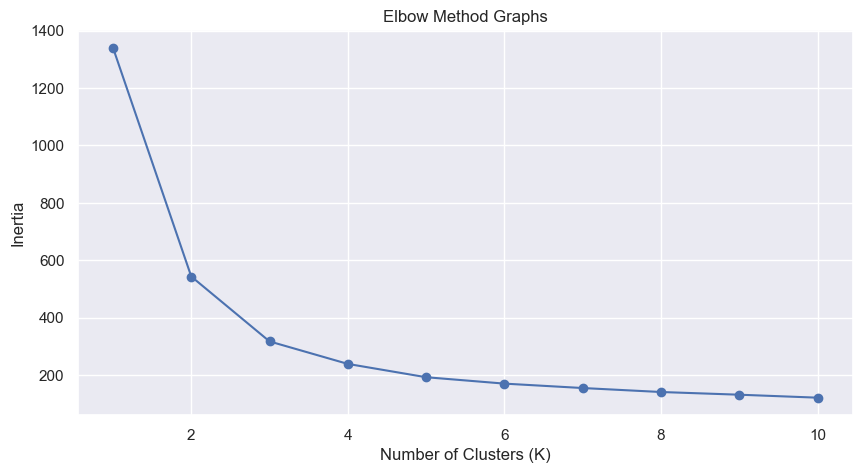

In [34]:
# plot the elbow method to get best number of clusters
wcss = [] # wcss is Within Cluster of Sum Squares
k_range = range(1, 11)

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init = 10)
    kmeans.fit(df_clustering_std.values)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
sns.set()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method Graphs')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

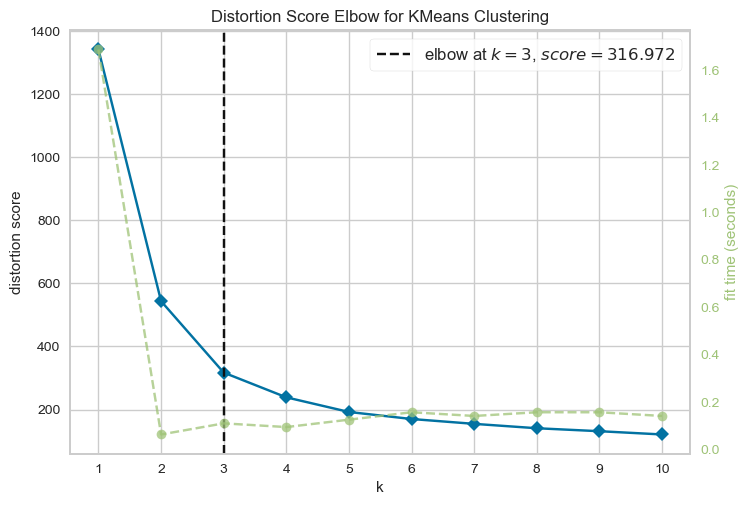

In [35]:
from yellowbrick.cluster import KElbowVisualizer

# Determine the best number of clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(df_clustering_std)
plt.xticks(list(k_range))
visualizer.show();

**Observation:**

Based on the results of determining the number of clustering using Elbow Method, changes do not change significantly in the 3 clusters, so customer clustering will be divided into 3 clusters.

### **K Means Clustering**

In [36]:
kMeans = KMeans(n_clusters=3, init='k-means++', max_iter =300, n_init=10, random_state=0) 
kMeans.fit(df_clustering_std.values)
df_clustering['Cluster'] = kMeans.labels_
df_clustering.head()

,CustomerID,TransactionID,Qty,TotalAmount,Cluster
0,1,17,60,623300,1
1,2,13,57,392300,1
2,3,15,56,446200,1
3,4,10,46,302500,2
4,5,7,27,268600,0


In [37]:
df_cluster_final = df_clustering.drop(columns=['CustomerID'])
df_cluster_final.head()

,TransactionID,Qty,TotalAmount,Cluster
0,17,60,623300,1
1,13,57,392300,1
2,15,56,446200,1
3,10,46,302500,2
4,7,27,268600,0


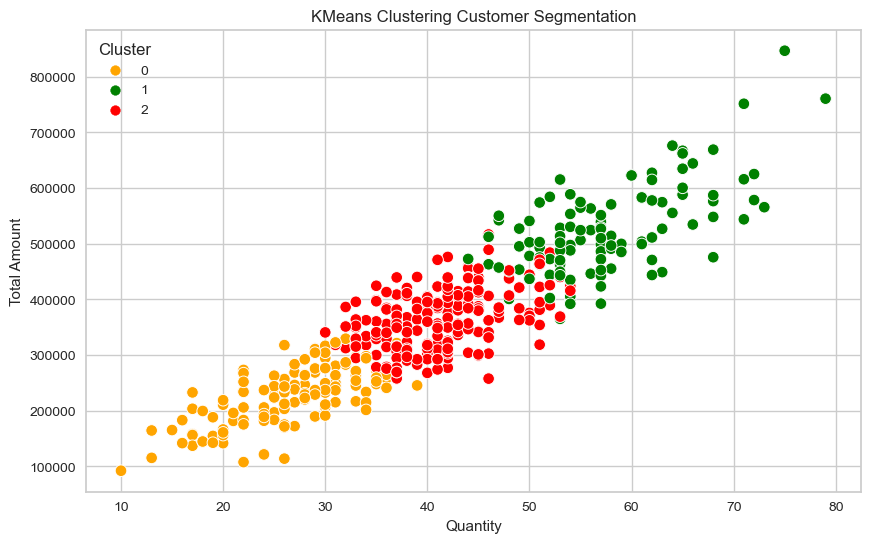

In [38]:
colors=['orange','green','red']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Qty', y='TotalAmount', data=df_cluster_final, hue='Cluster', palette=colors, s=70)
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('KMeans Clustering Customer Segmentation')
plt.legend(title='Cluster')
plt.show()

<Figure size 600x600 with 0 Axes>

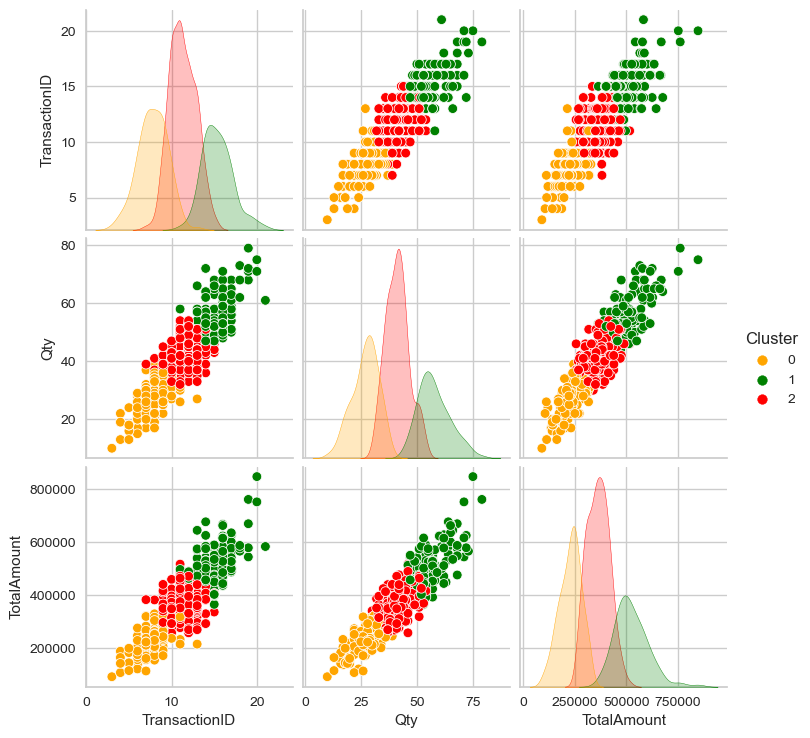

In [39]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df_cluster_final,hue='Cluster',palette=colors)
plt.show()

### **Silhouette Score**

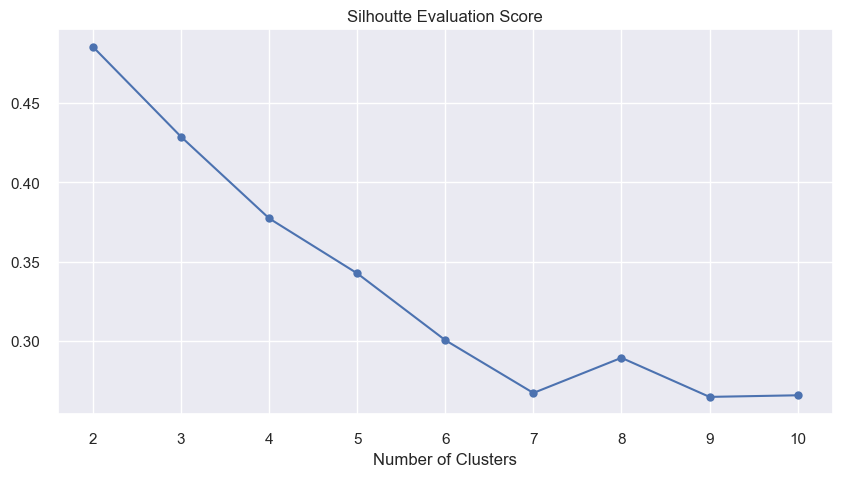

In [40]:
from sklearn.metrics import silhouette_score

n_clust = list(range(2,11))
silhouette_avg = []
for i in n_clust:
    kmeans = KMeans(n_clusters=i).fit(df_clustering_std)
    preds = kmeans.predict(df_clustering_std)
    score_euclidean = silhouette_score(df_clustering_std, preds, metric='euclidean')
    silhouette_avg.append(score_euclidean)

plt.figure(figsize=(10, 5))
sns.set()
plt.plot(range(2, 11), silhouette_avg, marker='o')
plt.title('Silhoutte Evaluation Score')
plt.xlabel('Number of Clusters')
plt.show()

# **Business Recomendation**

In [41]:
clust_df['CustomerID'] = df_clustering['CustomerID']
df_clustering_final = df_clustering.groupby('Cluster').agg({'CustomerID' : 'count',
                                                        'TransactionID' : 'mean',
                                                        'Qty' : 'mean',
                                                        'TotalAmount' : 'mean'})
df_clustering_final.sort_values('CustomerID', ascending = False)
df_clustering_final.head()

,CustomerID,TransactionID,Qty,TotalAmount
Cluster,,,,
0,135,7.785,26.933,229388.889
1,110,15.364,57.636,524504.545
2,202,11.282,41.188,363267.327


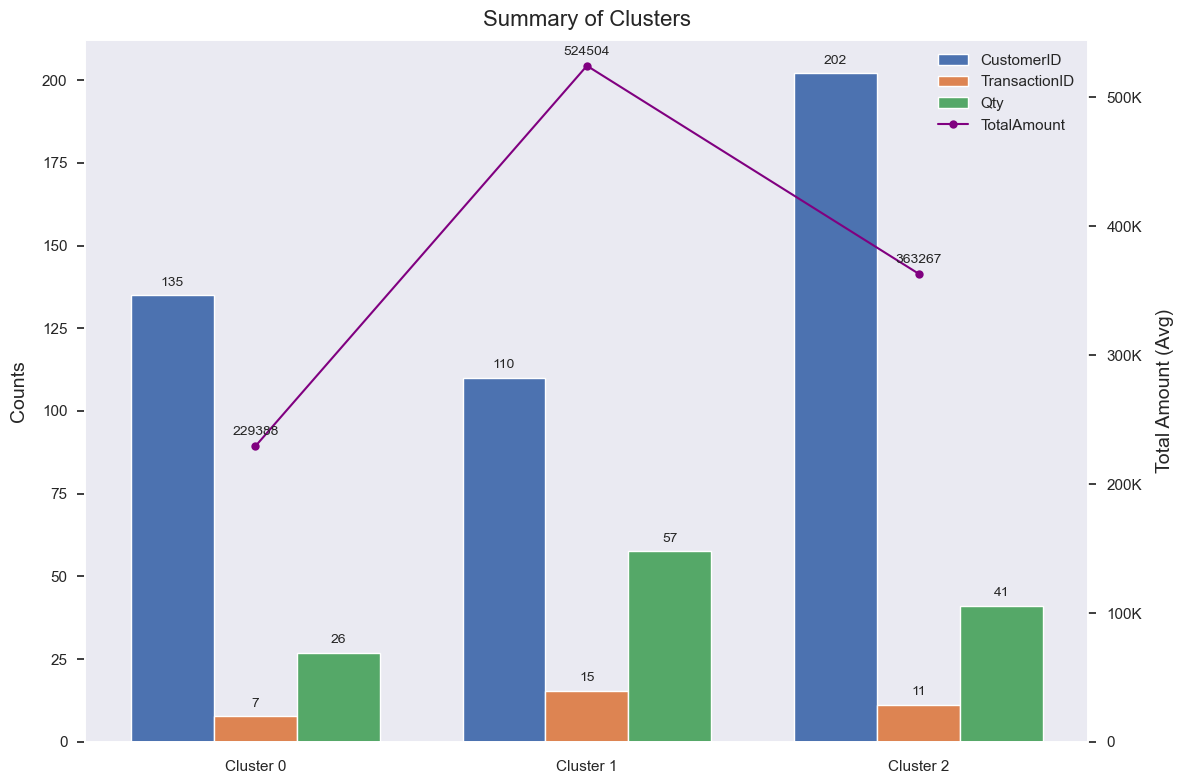

In [42]:
plt.rc('axes', grid=False)

x_arange = np.arange(len(df_clustering_final))
width_bar = 0.25

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting for Total Customers, Average Transaction ID and Average Quantity
for i, metric in enumerate(df_clustering_final.columns[0:3]):
    ax.bar(
        x_arange + i*width_bar,
        df_clustering_final[metric],
        width_bar,
        label=f'{metric}'
    )
    for j, val in enumerate(df_clustering_final[metric]):
        ax.text(j + i*width_bar, val + 2, int(val), ha='center', va='bottom', fontsize=10)
        
# Plotting Average Total Amount
x_arange_amount = [0.25, 1.25, 2.25]
ax2 = ax.twinx()
ax2.plot(x_arange_amount, df_clustering_final['TotalAmount'],
         color='purple', marker='o', label=df_clustering_final.columns[3])
for i, val in enumerate(df_clustering_final['TotalAmount']):
    ax2.text(i + 0.25, val + 6_000, int(val), ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Counts', labelpad=10, fontsize=14)
ax2.set_ylabel('Total Amount (Avg)', labelpad=10, fontsize=14)
plt.title('Summary of Clusters', pad=10, fontsize=16)

# Equalized the position of the x_arange axis and added labels.
ax.set_xticks(x_arange + width_bar)
ax.set_xticklabels(f'Cluster {label}' for label in df_clustering_final.index)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# The y-axis value on the second axis
ax2.set_ylim([0, df_clustering_final['TotalAmount'].max() + 20_000])
ax2.set_yticklabels([f'{int(x)}' if x < 1000 else f'{int(x/1000)}K' for x in ax2.get_yticks()])

plt.tight_layout()

**Conclusion**

Based on the clustering prediction results, there are 3 customer segments:

- Segment 0 has 135 customers with an average of 8 transactions per customer, 27 average items per transaction, and an average total purchase of Rp 229.389.

- Segment 1 has 110 customers with an average of 15 transactions per customer, 58 average items per transaction, and an average total purchase of Rp 524.504.

- Segment 2 has 202 customers with an average of 11 transactions per customer, 41 average items per transaction, and an average total purchase of Rp 362.267.

**Recommendation**

- Segment 0: Customers in this segment have a low transaction frequency, a moderate number of items per transaction, and relatively low total purchases. The recommendation for this segment is to provide special promotions or discounts to encourage customers to make more transactions.

- Segment 1: Customers in this segment have high transaction frequency, a high number of items per transaction, and a high total purchase. The recommendation for this segment is to provide promotions that focus on customer rewards and recognition, such as loyalty programs or special discounts for loyal customers.

- Segment 2: Customers in this segment have a moderate frequency of transactions, a high number of items per transaction, and moderate total purchases. The recommendation for this segment is to provide promotions that focus on increasing the number of items per transaction, such as product bundling or special offers for purchases of a certain amount.